## Install the package dependencies before running this notebook

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob

s = """
    number of trajectories in each city 
    # austin --  train: 43041 test: 6325
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds (50 timesteps), output 6 seconds (60 timesteps).
    """
print(s)



    number of trajectories in each city 
    # austin --  train: 43041 test: 6325
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds (50 timesteps), output 6 seconds (60 timesteps).
    


## Create a Torch.Dataset class for the training dataset

In [2]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = "./"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

# Returns entire dataset for a city. Training input and label output, or just test input.
def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = os.path.join(ROOT_PATH, split, f"{city}_inputs")
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs) # All input trajectories
    outputs = None # Labels when training, empty if testing
    
    if split=="train":
        f_out = os.path.join(ROOT_PATH, split, f"{city}_outputs")
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    print(f"inputs shape = {inputs.shape}")
    print(f"outputs shape = {outputs.shape}")
    return inputs, outputs

"""Dataset class for Argoverse"""
class ArgoverseDataset(Dataset):
    def __init__(self, city:str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform
        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self, idx):
        data = (self.inputs[idx], self.outputs[idx]) # Each data is a tuple of (input trajectory, output trajectory)
        if self.transform:
            data = self.transform(data)
        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
city_dataset  = ArgoverseDataset(city = city, split = split)
print(f"{split.upper()} dataset ready for {city.upper()}.")

inputs shape = (11993, 50, 2)
outputs shape = (11993, 60, 2)
TRAIN dataset ready for PALO-ALTO.


## Create a DataLoader class for training

In [3]:
batch_sz = 4  # batch size 
fullcity_loader = DataLoader(city_dataset,batch_size=batch_sz)
print(f"{split.upper()} dataloader using batches of {batch_sz} is ready for city {city.upper()}.")

TRAIN dataloader using batches of 4 is ready for city PALO-ALTO.


## Sample a batch of data and visualize 

Loaded batch #0
    Shape is (batch, trajectory_length, coord_dim)
    inp shape = torch.Size([4, 50, 2])
    out shape = torch.Size([4, 60, 2])
    batch_sz = 4
    agent_sz = 50

Each column is one (input,output) pair


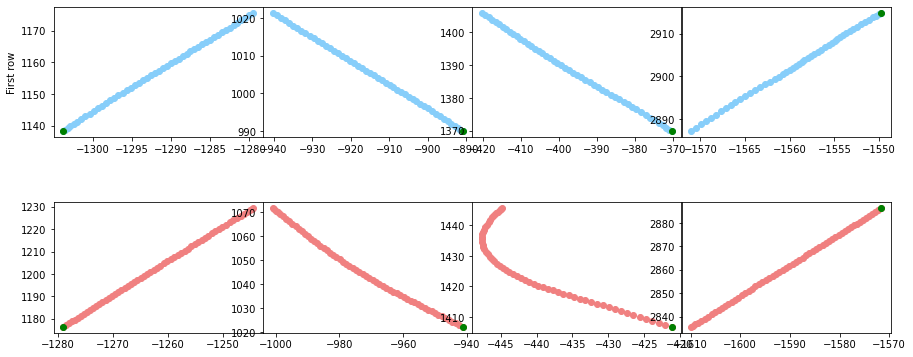

In [4]:
import matplotlib.pyplot as plt
import random


def show_sample_batch(sample_batch):
    """visualize the trajectory for a batch of samples"""
    inp, out = sample_batch
    print(f"    Shape is (batch, trajectory_length, coord_dim)")
    print(f"    inp shape = {inp.shape}")
    print(f"    out shape = {out.shape}")
    batch_sz = inp.size(0)
    agent_sz = inp.size(1) # Input trajectory length?
    print(f"    batch_sz = {batch_sz}")
    print(f"    agent_sz = {agent_sz}")
    
    fig, axs = plt.subplots(2,batch_sz, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
#     axs = axs.ravel()   
    print("\nEach column is one (input,output) pair")
    axs[0][0].set_ylabel("First row")
    for i in range(batch_sz):
        # first two feature dimensions are (x,y) positions
        axs[0][i].scatter(inp[i,:,0], inp[i,:,1], c='lightskyblue')
        axs[1][i].scatter(out[i,:,0], out[i,:,1], c='lightcoral')
        # Show position at first time step
        axs[0][i].scatter(inp[i,0,0], inp[i,0,1], c='g')
        axs[1][i].scatter(out[i,0,0], out[i,0,1], c='g')        

        
for ith_batch, sample_batch in enumerate(fullcity_loader):
    print(f"Loaded batch #{ith_batch}")
    inp, out = sample_batch #
    """
    TODO:
      implement your Deep learning model
      implement training routine
    """
    show_sample_batch(sample_batch)
    break

## Training Loop

In [5]:

# loss = nn.MSELoss()
# input = torch.arange(12,dtype=torch.float32).reshape((3,4))
# print(input)
# target = input + 2
# print(target)
# output = loss(input,target)
# print(output)

# Check for GPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"device = {device}")
# !nvidia-smi -L

input = torch.arange(6)
print(input)
print(input.shape)
input = input.reshape(2,3)
print(input)
print(input.shape)
# input = torch.arange(24).reshape(4,3,2)
# # x = torch.zeros(1,4,2)
# x = torch.arange(8).reshape(4,1,2)
# x = -1*x
# x = torch.squeeze(x)
# x = torch.unsqueeze(x,1)
# print(f"x shape = {x.shape}")

# output = torch.cat((input,x), 1)
# x.shape
# output

tensor([0, 1, 2, 3, 4, 5])
torch.Size([6])
tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])


In [17]:
# Custom MLP layer based on this article: https://auro-227.medium.com/writing-a-custom-layer-in-pytorch-14ab6ac94b77
class MLPlayer(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input_size = input_size
        self.outL1 = nn.Linear(input_size, 32)
        self.outA1 = nn.ReLU()
        self.outL2 = nn.Linear(32,2)
    def forward(self, input):
        # assert input.size == self.input_size
        s1 = self.outL1(input)
        x2 = self.outA1(s1)
        s2 = self.outL2(x2)
        return s2


# Define model class: RNN using LSTM that is a many-to-many architecture.
# It takes in the 50-long input and only then starts predicting the next 60 timesteps autoregressively.
class rnn(nn.Module):
    
    def initStates(self, batch_size):
        # Use Xavier initialization?
        return torch.zeros(1, batch_size, self.hidden_size), torch.zeros(1, batch_size, self.hidden_size)    
    
    # Many-to-many LSTM with optional MLP on top (to hopefully massage output trajectory into more realistic shape)
    def __init__(self, input_size, hidden_size):
        
        # Boilerplate initializations
        super().__init__()
        self.hidden_size = hidden_size
        self.unroll = 60 # Number of timesteps we want to unroll after finishing reading input
        
        # Reads in 5 sec of input, gives final hidden/cell states and first predicted coord pair to decoder
        self.encoder = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Outputs 6 sec of predicted trajectory
        self.decoder = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Get output of decoder into 2-dim coord vector
        self.mlp = MLPlayer(hidden_size)    

        
    def forward(self, traj_in, hidden_init, cell_init):
        # Encode input trajectory to get hidden/cell states
        encoder_hidden_states, (final_encoder_hidden, final_encoder_cell) = self.encoder(traj_in, (hidden_init, cell_init))
#         print(f"final_encoder_hidden shape = {final_encoder_hidden.shape}")
        
        # Predict first coord pair using final encoder hidden/cell states
#         print(f"traj_in.shape[0] = {traj_in.shape[0]}")
        batch_size = traj_in.shape[0]
#         coords = torch.zeros((batch_size, self.unroll, 2)) # coords should be 4x60x2
        coords = self.mlp(final_encoder_hidden)
        coords = coords.reshape(batch_size,1,2)
        curr_coords = coords
#         coordstest = coords1.reshape(batch_size,1,2)
#         print(f"coordstest = {coordstest}")
#         print(f"coords shape = {coords.shape}")
#         print(f"coords1 shape = {coords1.shape}")
#         print(f"coords1 = {coords1}")
#         coords1 = torch.squeeze(coords1)
#         coords1 = torch.unsqueeze(coords1, 1)
#         print(f"coords1 shape = {coords1.shape}")
#         print(f"coords1 = {coords1}")
#         return
#         coords[0] = coords1
        
        # Autoregressively unroll next 59 timesteps: Pass hidden/cell states and predicted coords to next timestep
#         unrolled_hidden = torch.zeros([batchsize, self.unroll, self.hidden_size], dtype=torch.float64)
        curr_hidden, curr_cell = final_encoder_hidden, final_encoder_cell
        for timestep in range(1,self.unroll): # Looping in range [1,60)
            curr_hidden_states, (curr_hidden, curr_cell) = self.decoder(curr_coords, (curr_hidden, curr_cell))
            coords_pred = self.mlp(curr_hidden)
            coords_pred = coords_pred.reshape(batch_size,1,2)
            coords = torch.cat((coords,coords_pred), 1)
            curr_coords = coords_pred
#             coords[timestep] = coords_pred

        # Reshape coords list into a 120-dim vector and return
#         print(f"coords shape = {coords.shape}")
#         coords = coords.reshape(batch_size, self.unroll*2)
#         print(f"coords shape = {coords.shape}")
        return coords
            # Append this coord pair to predicted trajectory, should be 120 long after decoding is done
            # curr_hidden shape = (1, batchsize, hiddensize)
#             unrolled_hidden[:,timestep,:] = curr_hidden


# Train/val split
city = 'palo-alto' 
split = 'train'
full_dataset  = ArgoverseDataset(city = city, split = split)
train_set, validation_set = torch.utils.data.random_split(full_dataset, [int(len(full_dataset)*5/6), len(full_dataset)-int(len(full_dataset)*5/6)])
print(f"full_dataset type = {type(full_dataset)}")
print(f"train_set type = {type(train_set)}")
# Each element of train_set is a tuple of (input trajectory, output trajectory)

# Dataloaders
batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size,shuffle=True,drop_last=True, pin_memory=True)
validation_loader = DataLoader(validation_set, batch_size=batch_size,drop_last=True, pin_memory=True)

# Instantiate model
hidden_size = 128
input_size = 2
# input_size = 2*len(train_set[0][0]) # 2*50 = 100 since there are x and y for 50 time steps
    # print(f"length of train_set tuple = {len(train_set[1][0])}, {len(train_set[1][1])}")
    # print(f"input_size = {input_size}")
    # # assert train_set[1].shape == 50
    # assert input_size == 100
model = rnn(input_size, hidden_size)
model.cuda()

# Hyperparameters
lr = 0.01
num_epochs = 50
opt = torch.optim.Adam(model.parameters(),lr=lr)
loss_func = nn.MSELoss(reduction='sum')
from math import sqrt # To get RMSE from MSE


# Tracking metrics
all_losses1 = [] # Train loss
all_losses2 = [] # Validation loss
import time
from tqdm import tqdm
start_time = time.time()


for epoch in range(num_epochs):
    
    # Epoch for train set
    model.train()
    train_loss = 0
    train_loss_alt = 0
    for batch_num, sample_batch in enumerate(tqdm(train_loader)):
        # Get batch of input and target trajectories.
        trajs_in, trajs_target = sample_batch # Get input and output trajectories
        trajs_in, trajs_target = trajs_in.float(), trajs_target.float()
        trajs_in, trajs_target = trajs_in.cuda(), trajs_target.cuda()
#         trajs_in = trajs_in.view(-1,input_size)
#         trajs_target = trajs_target.view(-1,trajs_target.shape[1]*2)
#         print(f"trajs_in shape = {trajs_in.shape}")
#         print(f"trajs_target shape = {trajs_target.shape}")
        
        
        # Initialize LSTM hidden/cell states,
        # Forward pass: 
            #    trajs_in is the input, trajs_out
            #    trajs_out is the model output
            #    trajs_target is the groundtruth 
        hidden_init, cell_init = model.initStates(batch_size)
        hidden_init, cell_init = hidden_init.cuda(), cell_init.cuda()
#         print(f"trajs_in shape = {trajs_in.shape}")
        trajs_out = model(trajs_in, hidden_init, cell_init)
        
        # Calculate loss
        l_alt = ((trajs_out - trajs_target) ** 2).sum()
        l = loss_func(trajs_out, trajs_target)
        
        # Gradient descent
        opt.zero_grad()
        l.backward()
        opt.step()
        
        # Accumulate the losses for this epoch, do these operations affect autograd?
        train_loss += l.item()
        train_loss_alt += l_alt.item()
        
    # Track losses over all epochs
    all_losses1.append(train_loss / len(train_loader))  
        
        
    # Epoch for validation set
    model.eval()
    validation_loss = 0
    validation_loss_alt = 0
    for batch_num, sample_batch in enumerate(tqdm(validation_loader)):
        # Get batch of input and target trajectories.
        trajs_in, trajs_target = sample_batch # Get input and output trajectories
        trajs_in, trajs_target = trajs_in.float(), trajs_target.float()
        trajs_in, trajs_target = trajs_in.cuda(), trajs_target.cuda()
#         print(f"trajs_in shape = {trajs_in.shape}")
#         print(f"trajs_target shape = {trajs_target.shape}")
        
        # Initialize LSTM hidden/cell states,
        # Forward pass: 
            #    trajs_in is the input, trajs_out
            #    trajs_out is the model output
            #    trajs_target is the groundtruth 
        hidden_init, cell_init = model.initStates(batch_size)
        hidden_init, cell_init = hidden_init.cuda(), cell_init.cuda()
        trajs_out = model(trajs_in, hidden_init, cell_init)
        
        # Calculate loss
        l_alt = ((trajs_out - trajs_target) ** 2).sum()
        l = loss_func(trajs_out, trajs_target)
        
        # Accumulate the losses for this epoch, do these operations affect autograd?
        validation_loss += l.item()
        validation_loss_alt += l_alt.item()
        
    # Track losses over all epochs
    all_losses2.append(validation_loss / len(validation_loader)) 

    
    # Print training progress
    print(f'(train) epoch {epoch + 1},      avg. train loss     : { train_loss / len(train_loader) }') # What does :f do?
    print(f"train_alt = {(train_loss_alt/len(train_loader))/4/120}")
    print(f'(validation) epoch {epoch + 1}, avg. validation loss: {validation_loss / len(validation_loader)}') # What does :f do?
    print(f"validation_alt = {(validation_loss_alt/len(validation_set))/120}")
    # This is loss per coordinate, eg. (x - x_hat)^2 or (y - y_hat)^2
    
end_time = time.time()
print(f"took {end_time-start_time} seconds, time per epoch = {(end_time-start_time)/num_epochs}")

inputs shape = (11993, 50, 2)
outputs shape = (11993, 60, 2)
full_dataset type = <class '__main__.ArgoverseDataset'>
train_set type = <class 'torch.utils.data.dataset.Subset'>


100%|██████████| 62/62 [00:01<00:00, 60.62it/s]


(train) epoch 1,      avg. train loss     : 4955812202.666667
train_alt = 10324608.755555557
(validation) epoch 1, avg. validation loss: 6173233292.387096
validation_alt = 1595549.7087210272


100%|██████████| 62/62 [00:01<00:00, 50.52it/s]


(train) epoch 2,      avg. train loss     : 9196411213.128204
train_alt = 19159190.027350426
(validation) epoch 2, avg. validation loss: 14288186252.387096
validation_alt = 3692961.262497916


100%|██████████| 62/62 [00:01<00:00, 61.71it/s]


(train) epoch 3,      avg. train loss     : 17616983718.564102
train_alt = 36702049.41367521
(validation) epoch 3, avg. validation loss: 26631928039.225807
validation_alt = 6883356.421677505


100%|██████████| 62/62 [00:01<00:00, 60.77it/s]


(train) epoch 4,      avg. train loss     : 30957512139.48718
train_alt = 64494816.95726495
(validation) epoch 4, avg. validation loss: 21038977123.096775
validation_alt = 5437787.984125395


100%|██████████| 62/62 [00:01<00:00, 51.40it/s]


(train) epoch 5,      avg. train loss     : 71131008124.71794
train_alt = 148189600.25982904
(validation) epoch 5, avg. validation loss: 94067988281.80646
validation_alt = 24313053.499549773


100%|██████████| 62/62 [00:01<00:00, 61.28it/s]


(train) epoch 6,      avg. train loss     : 52162728802.46154
train_alt = 108672351.67179488
(validation) epoch 6, avg. validation loss: 37709896968.258064
validation_alt = 9746596.68180757


100%|██████████| 62/62 [00:00<00:00, 62.50it/s]


(train) epoch 7,      avg. train loss     : 27609792147.692307
train_alt = 57520400.307692304
(validation) epoch 7, avg. validation loss: 35352812907.354836
validation_alt = 9137378.690411871


100%|██████████| 62/62 [00:01<00:00, 61.55it/s]


(train) epoch 8,      avg. train loss     : 62247664607.17949
train_alt = 129682634.5982906
(validation) epoch 8, avg. validation loss: 58892993370.83871
validation_alt = 15221634.104518926


 29%|██▉       | 92/312 [00:05<00:12, 16.97it/s]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Should be per trajectory loss
plt.figure()
plt.plot(all_losses1,label="avg. train loss")

plt.plot(all_losses2,label="avg. validation loss")
leg = plt.legend(loc='upper center')
plt.show()